In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from tensorflow.keras import layers
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory

import numpy as np

In [16]:
new_base_dir = "./2-step/split data"

#new_base_dir = pathlib.Path("./2-step/split data")

In [ ]:
# input size = 100x100

In [21]:
IMG_W = 100
IMG_H = 100
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 20
BATCH_SIZE = 16

train_dataset = image_dataset_from_directory(
new_base_dir + "/train",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
new_base_dir + "/val",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE,
)

test_dataset = image_dataset_from_directory(
new_base_dir + "/test",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

Found 2100 files belonging to 2 classes.
Found 450 files belonging to 2 classes.
Found 450 files belonging to 2 classes.


In [22]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 8s 43ms/step - loss: 0.6046 - accuracy: 0.6814 - true_positives_3: 572.0000 - true_negatives_3: 859.0000 - val_loss: 0.4544 - val_accuracy: 0.8667 - val_true_positives_3: 184.0000 - val_true_negatives_3: 206.0000
Epoch 2/20
132/132 [==============================] - 6s 40ms/step - loss: 0.4395 - accuracy: 0.8462 - true_positives_3: 862.0000 - true_negatives_3: 915.0000 - val_loss: 0.3678 - val_accuracy: 0.8933 - val_true_positives_3: 194.0000 - val_true_negatives_3: 208.0000
Epoch 3/20
132/132 [==============================] - 6s 40ms/step - loss: 0.3736 - accuracy: 0.8752 - true_positives_3: 921.0000 - true_negatives_3: 917.0000 - val_loss: 0.3729 - val_accuracy: 0.8889 - val_true_positives_3: 179.0000 - val_true_negatives_3: 221.0000
Epoch 4/20
132/132 [==============================] - 6s 42ms/step - loss: 0.3236 - accuracy: 0.9057 - true_positives_3: 959.0000 - true_negatives_3: 943.0000 - val_loss: 0.3061 - val_accuracy: 0.911

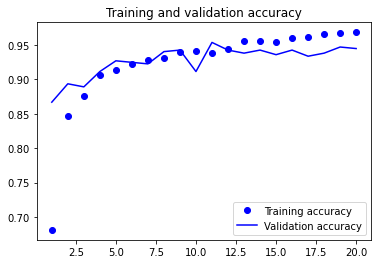

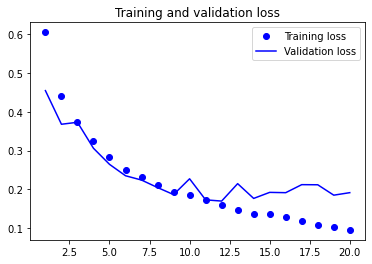

In [23]:
# test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

# print(f"Test accuracy: {test_acc:.3f}",
#       f"\nTest loss: {test_loss:.3f}",
#       f"\nTrue positive: {true_pos:.3f}",
#       f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [17]:
# base model 150x150

In [4]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 20
BATCH_SIZE = 16


train_dataset = image_dataset_from_directory(
new_base_dir + "/train",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
new_base_dir + "/val",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE,
)

test_dataset = image_dataset_from_directory(
new_base_dir + "/test",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

Found 2100 files belonging to 2 classes.
Found 450 files belonging to 2 classes.
Found 450 files belonging to 2 classes.


In [5]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 11s 46ms/step - loss: 0.6550 - accuracy: 0.6095 - true_positives: 629.0000 - true_negatives: 651.0000 - val_loss: 0.5668 - val_accuracy: 0.7800 - val_true_positives: 130.0000 - val_true_negatives: 221.0000
Epoch 2/20
132/132 [==============================] - 6s 41ms/step - loss: 0.4615 - accuracy: 0.8424 - true_positives: 873.0000 - true_negatives: 896.0000 - val_loss: 0.4309 - val_accuracy: 0.8489 - val_true_positives: 210.0000 - val_true_negatives: 172.0000
Epoch 3/20
132/132 [==============================] - 6s 43ms/step - loss: 0.3769 - accuracy: 0.8805 - true_positives: 905.0000 - true_negatives: 944.0000 - val_loss: 0.3421 - val_accuracy: 0.8933 - val_true_positives: 209.0000 - val_true_negatives: 193.0000
Epoch 4/20
132/132 [==============================] - 6s 43ms/step - loss: 0.3155 - accuracy: 0.9062 - true_positives: 950.0000 - true_negatives: 953.0000 - val_loss: 0.3107 - val_accuracy: 0.9000 - val_true_positives: 215

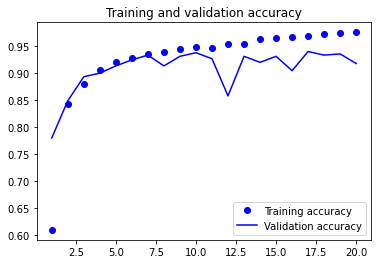

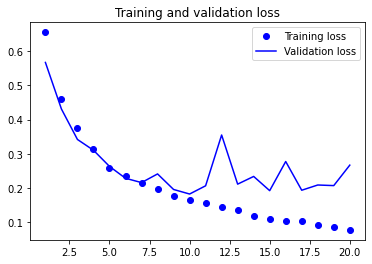

In [8]:
# test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

# print(f"Test accuracy: {test_acc:.3f}",
#       f"\nTest loss: {test_loss:.3f}",
#       f"\nTrue positive: {true_pos:.3f}",
#       f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# input size = 256x256

In [9]:
IMG_W = 256
IMG_H = 256
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 20
BATCH_SIZE = 16

train_dataset = image_dataset_from_directory(
new_base_dir + "/train",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
new_base_dir + "/val",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE,
)

test_dataset = image_dataset_from_directory(
new_base_dir + "/test",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

Found 2100 files belonging to 2 classes.
Found 450 files belonging to 2 classes.
Found 450 files belonging to 2 classes.


In [10]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 8s 48ms/step - loss: 0.4524 - accuracy: 0.8019 - true_positives_1: 843.0000 - true_negatives_1: 841.0000 - val_loss: 0.3751 - val_accuracy: 0.8689 - val_true_positives_1: 177.0000 - val_true_negatives_1: 214.0000
Epoch 2/20
132/132 [==============================] - 6s 44ms/step - loss: 0.2953 - accuracy: 0.9033 - true_positives_1: 942.0000 - true_negatives_1: 955.0000 - val_loss: 0.4414 - val_accuracy: 0.7867 - val_true_positives_1: 131.0000 - val_true_negatives_1: 223.0000
Epoch 3/20
132/132 [==============================] - 6s 46ms/step - loss: 0.2578 - accuracy: 0.9129 - true_positives_1: 955.0000 - true_negatives_1: 962.0000 - val_loss: 0.7259 - val_accuracy: 0.6133 - val_true_positives_1: 222.0000 - val_true_negatives_1: 54.0000
Epoch 4/20
132/132 [==============================] - 6s 45ms/step - loss: 0.2238 - accuracy: 0.9286 - true_positives_1: 979.0000 - true_negatives_1: 971.0000 - val_loss: 0.2582 - val_accuracy: 0.9022

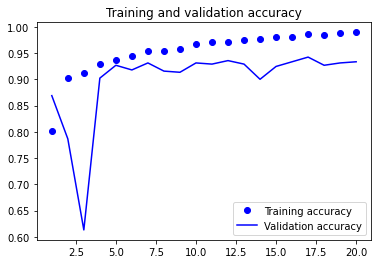

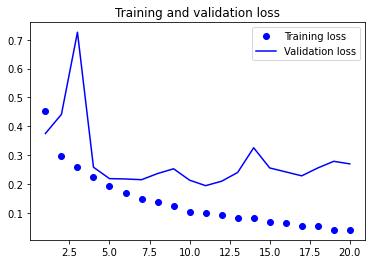

In [11]:
# test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

# print(f"Test accuracy: {test_acc:.3f}",
#       f"\nTest loss: {test_loss:.3f}",
#       f"\nTrue positive: {true_pos:.3f}",
#       f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [12]:
# input size = 512x512

In [13]:
IMG_W = 512
IMG_H = 512
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 20
BATCH_SIZE = 16

train_dataset = image_dataset_from_directory(
new_base_dir + "/train",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
new_base_dir + "/val",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE,
)

test_dataset = image_dataset_from_directory(
new_base_dir + "/test",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

Found 2100 files belonging to 2 classes.
Found 450 files belonging to 2 classes.
Found 450 files belonging to 2 classes.


In [14]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 22s 145ms/step - loss: 0.4186 - accuracy: 0.8167 - true_positives_2: 830.0000 - true_negatives_2: 885.0000 - val_loss: 0.3145 - val_accuracy: 0.8933 - val_true_positives_2: 199.0000 - val_true_negatives_2: 203.0000
Epoch 2/20
132/132 [==============================] - 18s 135ms/step - loss: 0.2771 - accuracy: 0.9086 - true_positives_2: 958.0000 - true_negatives_2: 950.0000 - val_loss: 0.2914 - val_accuracy: 0.8889 - val_true_positives_2: 201.0000 - val_true_negatives_2: 199.0000
Epoch 3/20
132/132 [==============================] - 18s 134ms/step - loss: 0.2333 - accuracy: 0.9262 - true_positives_2: 975.0000 - true_negatives_2: 970.0000 - val_loss: 0.2943 - val_accuracy: 0.8956 - val_true_positives_2: 198.0000 - val_true_negatives_2: 205.0000
Epoch 4/20
132/132 [==============================] - 18s 135ms/step - loss: 0.2012 - accuracy: 0.9390 - true_positives_2: 992.0000 - true_negatives_2: 980.0000 - val_loss: 0.2749 - val_accurac

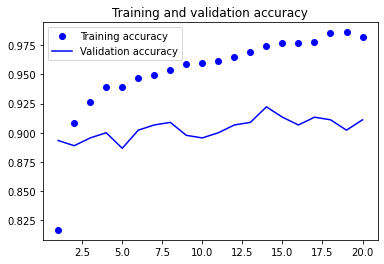

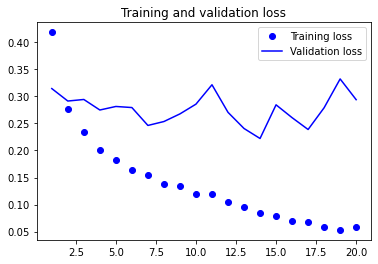

In [15]:
# test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

# print(f"Test accuracy: {test_acc:.3f}",
#       f"\nTest loss: {test_loss:.3f}",
#       f"\nTrue positive: {true_pos:.3f}",
#       f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()